# Week 2 : Tidy Data, Handling DateTime and Forecasting

In [ ]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Data Description

This tutorial uses air quality data Nitrogen Dioxide (NO2) and Particulate matter less than 2.5 micrometers, made available by openaq and using the py-openaq package. The air_quality_long.csv data set provides  and  values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

The air-quality data set has the following columns:

city: city where the sensor is used, either Paris, Antwerp or London

country: country where the sensor is used, either FR, BE or GB

location: the id of the sensor, either FR04014, BETR801 or London Westminster

parameter: the parameter measured by the sensor, either  or Particulate matter

value: the measured value

unit: the unit of the measured parameter, in this case ‘µg/m³’

and the index of the DataFrame is datetime, the datetime of the measurement.

For more data visit: [EPA.gov](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information)

#### Task 1: Import necessary libraries

In [10]:
import pandas as pd

#### Task 2: Import Data and quick checks

In [9]:
import pandas as pd
indata= pd.read_csv("air_quality_long.csv")
indata.tail()

,city,country,date.utc,location,parameter,value,unit
5267,London,GB,2019-04-09 06:00:00+00:00,London Westminster,no2,41.0,µg/m³
5268,London,GB,2019-04-09 05:00:00+00:00,London Westminster,no2,41.0,µg/m³
5269,London,GB,2019-04-09 04:00:00+00:00,London Westminster,no2,41.0,µg/m³
5270,London,GB,2019-04-09 03:00:00+00:00,London Westminster,no2,67.0,µg/m³
5271,London,GB,2019-04-09 02:00:00+00:00,London Westminster,no2,67.0,µg/m³


In [25]:
indata.dtypes

city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [26]:
indata.city.unique()

array(['Antwerpen', 'London', 'Paris'], dtype=object)

In [27]:
indata[["country","city","location"]].value_counts()

country  city       location          
GB       London     London Westminster    3256
FR       Paris      FR04014               1676
BE       Antwerpen  BETR801                340
dtype: int64

## Pivot and Melt

####  Task 3: Create a dataset with each row has a unique date and each column is a parameter value for a particular location (long --> wide)

#### Task 4: Get the dataset created in task 1 in the long format.

In [94]:
no2 = indata[indata["parameter"] == "no2"]
no2_pivot = no2.pivot(index = "date.utc", columns = "location", values="value")

In [95]:
no2_pivot.head()

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,54.5,34.2,67.0
2019-04-09 04:00:00+00:00,34.5,48.5,41.0
2019-04-09 05:00:00+00:00,46.5,59.5,41.0


<AxesSubplot:xlabel='date.utc'>

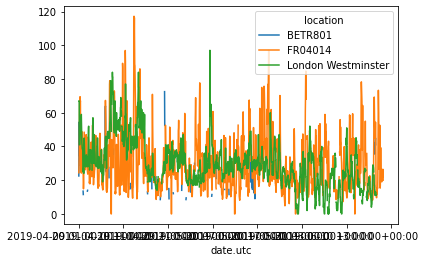

In [96]:
no2_pivot.plot()

In [97]:
no2_pivot.dtypes

location
BETR801               float64
FR04014               float64
London Westminster    float64
dtype: object

In [98]:
no2_pivot2 = no2_pivot.reset_index()
# melt
no2_long = no2_pivot2.melt(id_vars = "date.utc")
no2_long.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


## Tidy Data 
####  Task 5: Create a dataset with only GB values and get it in tidy format to analyze relationship between no2 and pm25

In [126]:
be_data = indata[indata["country"] == "BE"]
be_data.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [127]:
be_datap = be_data.pivot(index = "date.utc", columns = "parameter", values = "value")
be_datap.head()

parameter,no2,pm25
date.utc,,
2019-04-09 01:00:00+00:00,22.5,76.0
2019-04-09 02:00:00+00:00,53.5,91.5
2019-04-09 03:00:00+00:00,54.5,99.0
2019-04-09 04:00:00+00:00,34.5,83.5
2019-04-09 05:00:00+00:00,46.5,68.0


In [128]:
be_datap.reset_index(inplace=True)
be_datap.head()

parameter,date.utc,no2,pm25
0,2019-04-09 01:00:00+00:00,22.5,76.0
1,2019-04-09 02:00:00+00:00,53.5,91.5
2,2019-04-09 03:00:00+00:00,54.5,99.0
3,2019-04-09 04:00:00+00:00,34.5,83.5
4,2019-04-09 05:00:00+00:00,46.5,68.0


## Handling Datetime

#### Task 6: Create two new columns, month and day of the week

#### Task 7: Convert the hourly data into a daily data

In [129]:
be_datap["datetime"] = pd.to_datetime(be_datap["date.utc"])
be_datap.head()

parameter,date.utc,no2,pm25,datetime
0,2019-04-09 01:00:00+00:00,22.5,76.0,2019-04-09 01:00:00+00:00
1,2019-04-09 02:00:00+00:00,53.5,91.5,2019-04-09 02:00:00+00:00
2,2019-04-09 03:00:00+00:00,54.5,99.0,2019-04-09 03:00:00+00:00
3,2019-04-09 04:00:00+00:00,34.5,83.5,2019-04-09 04:00:00+00:00
4,2019-04-09 05:00:00+00:00,46.5,68.0,2019-04-09 05:00:00+00:00


In [130]:
be_datap.dtypes

parameter
date.utc                 object
no2                     float64
pm25                    float64
datetime    datetime64[ns, UTC]
dtype: object

In [131]:
be_datap["datetime"].max() - be_datap["datetime"].min()

Timedelta('70 days 05:00:00')

In [132]:
be_datap["month"] = be_datap["datetime"].dt.month
be_datap.month.unique()

array([4, 5, 6], dtype=int64)

In [133]:
be_datap["day"] = be_datap["datetime"].dt.dayofweek
be_datap.day.unique()

array([1, 2, 3, 4, 0, 5, 6], dtype=int64)

In [134]:
be_datap.set_index("datetime", drop=True, inplace=True)
be_datap.head()

parameter,date.utc,no2,pm25,month,day
datetime,,,,,
2019-04-09 01:00:00+00:00,2019-04-09 01:00:00+00:00,22.5,76.0,4,1
2019-04-09 02:00:00+00:00,2019-04-09 02:00:00+00:00,53.5,91.5,4,1
2019-04-09 03:00:00+00:00,2019-04-09 03:00:00+00:00,54.5,99.0,4,1
2019-04-09 04:00:00+00:00,2019-04-09 04:00:00+00:00,34.5,83.5,4,1
2019-04-09 05:00:00+00:00,2019-04-09 05:00:00+00:00,46.5,68.0,4,1


In [196]:
dailydata = be_datap.resample('D').mean()
dailydata.head()

parameter,no2,pm25,month,day
datetime,,,,
2019-04-09 00:00:00+00:00,37.961538,59.461538,4.0,1.0
2019-04-10 00:00:00+00:00,12.500000,25.250000,4.0,2.0
2019-04-11 00:00:00+00:00,13.750000,9.500000,4.0,3.0
2019-04-12 00:00:00+00:00,23.750000,22.000000,4.0,4.0
2019-04-13 00:00:00+00:00,NaN,NaN,NaN,NaN


## Regression

#### Task 8: Plot a scatterplot to visually evaluate the relationship between no2 and pm25

#### Task 9: Fit a linear regression

<AxesSubplot:xlabel='no2', ylabel='pm25'>

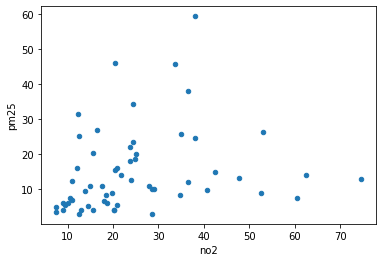

In [197]:
dailydata.plot.scatter(x="no2", y="pm25")

In [137]:
dailydata.isnull().sum()

parameter
no2      13
pm25      3
month     3
day       3
dtype: int64

In [138]:
be_datap.shape

(180, 5)

In [139]:
dailydata.shape

(71, 4)

In [174]:
cleaneddata = dailydata.dropna()
rowsdropped = dailydata.shape[0] - cleaneddata.shape[0]
print("Number of rows dropped that had missing values: " + str(rowsdropped))

Number of rows dropped that had missing values: 13


In [190]:
import statsmodels.api as sm
Y = cleaneddata["pm25"]
X = cleaneddata["no2"]
Z = sm.add_constant(X)
regmodel = sm.OLS(Y,Z)

In [159]:
regmodel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.087
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0844
Time:                        21:21:20   Log-Likelihood:                -223.92
No. Observations:                  58   AIC:                             451.8
Df Residuals:                      56   BIC:                             456.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3841      3.021      3.437      0.001       4.331      16.437
no2            0.1833      0.104      1.757      0.084      -0.026       0.392
==============================================================================
Omnibus:                       26.523   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.193
Skew:                           1.641   Prob(JB):                     6.88e-10
Kurtosis:                       5.585   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
regmodel.fit().params

const    10.384135
no2       0.183290
dtype: float64

## Forecast

#### Task 10: Fit a exponential smoothing (Holt Winters) Model

In [200]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

add_model = ExponentialSmoothing(cleaneddata['pm25'], trend = 'additive', seasonal = 'additive', seasonal_periods = 7)
add_results = add_model.fit()
add_fit = add_results.predict(0, len(cleaneddata))

C:\Users\awrap\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\awrap\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [201]:
mul_model = ExponentialSmoothing(cleaneddata['pm25'], trend = 'multiplicative', seasonal = 'multiplicative', seasonal_periods = 7)
mul_results = mul_model.fit()
mul_fit = mul_results.predict(0, len(cleaneddata))

C:\Users\awrap\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\awrap\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\awrap\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


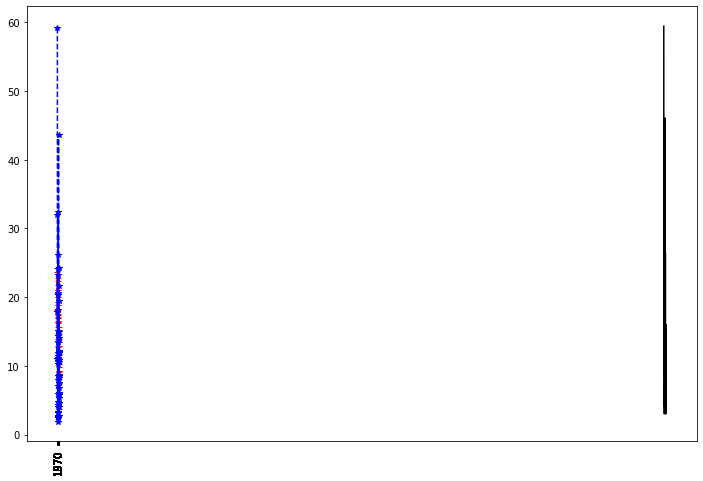

In [202]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
tickvalues = range(0, len(cleaneddata.index))
plt.xticks(ticks = tickvalues, rotation = 'vertical')
plt.plot(Y, linestyle = 'solid', color = 'black', label = 'Actual')
plt.plot(add_fit, linestyle = 'dashed', color = 'red', marker = '+', label = 'Additive Model')
plt.plot(mul_fit, linestyle = 'dashed', color = 'blue', marker = '*', label = 'Multiplicative Model')

More information available on [to_datetime](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-components)
[What is the point of indexing in pandas](https://stackoverflow.com/questions/27238066/what-is-the-point-of-indexing-in-pandas)

Reference: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-reshaping